### Import Libraries and Helper Functions for imputing missing values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def ret_value(X):
    num_columns = X.shape[1]
    arr_common = []
    x = pd.Series([])
    for col_num in range(num_columns):
        arr_common.append(X.iloc[:,col_num].value_counts().index[0])
        to_concat = X.iloc[:,col_num].fillna(arr_common[col_num])
        x = to_concat if len(x) == 0 else pd.concat([x, to_concat],axis=1)
    return x

class MostCommonImpute(BaseEstimator, TransformerMixin):
    def __init__(self,a=2): # no *args or **kargs
        self.a = a
    def fit(self, X, y=None):
         return self                                 
    def transform(self, X, y=None):
        return ret_value(X)      
        
class ImputerNoAccess(BaseEstimator, TransformerMixin):
    def __init__(self, word_to_fill): # no *args or **kargs
        self.word_to_fill = word_to_fill
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        return X.fillna(self.word_to_fill)
    
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('train[1].csv')
df.index = df['Id']
df.drop(columns=['Id'], inplace=True)

In [3]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Click on the button to check the Log Transformation

Button(description='Log Transformation', style=ButtonStyle())

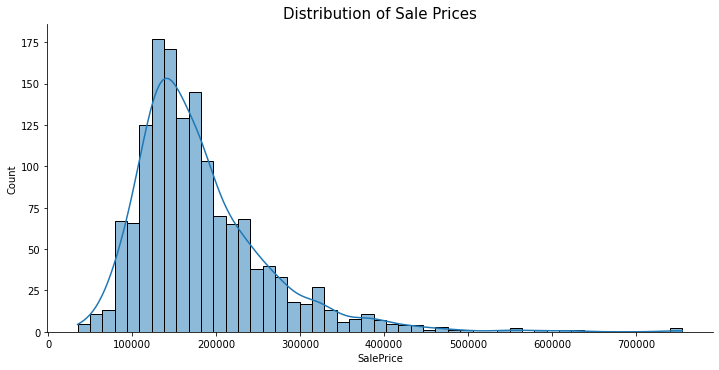

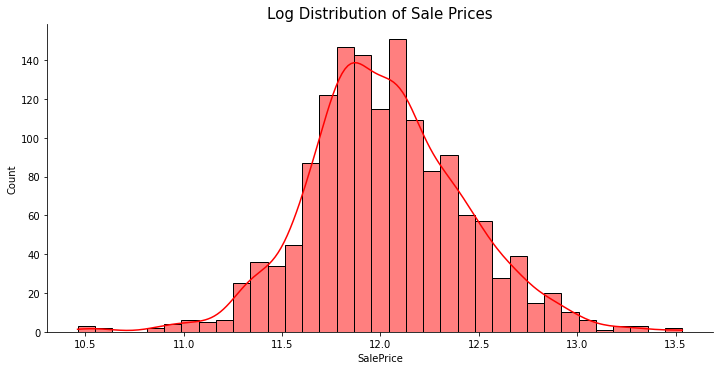

In [6]:
sns.displot(df['SalePrice'],aspect=16.7/8.27,kde=True)
plt.title('Distribution of Sale Prices', fontsize=15);

btn = widgets.Button(description='Log Transformation');
display(btn)
def btn_eventhandler(obj):
    sns.displot(np.log(df['SalePrice']),aspect=16.7/8.27,kde=True,color='red')
    plt.title('Log Distribution of Sale Prices',fontsize=15);

btn.on_click(btn_eventhandler);

###### After the log transformation - the distribution resembles Normal Distribution - so log transformation of the Target Variable may be appropriate to use in the modeling park

### Imputing missing values

In [8]:
impute_w_median = ['LotFrontage','MasVnrArea']
impute_w_noAccess = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
impute_w_MostCommon = ['MasVnrType','Electrical']

fill_transformer = make_column_transformer(
    (SimpleImputer(strategy='median'), impute_w_median),
    (ImputerNoAccess(word_to_fill='No_Access'), impute_w_noAccess),
    (MostCommonImpute(),impute_w_MostCommon)
    ,remainder='passthrough'
)

new_df = fill_transformer.fit_transform(df)

changed_columns = np.concatenate([impute_w_median,impute_w_noAccess,impute_w_MostCommon])
not_changed_columns = []
for each in df.columns:
    if each not in changed_columns:
        not_changed_columns.append(each)
        
new_df_columns = np.concatenate([changed_columns, not_changed_columns])
df = pd.DataFrame(data=new_df, columns=new_df_columns)


type_dwelling = { 20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}
df['MSSubClass'] = df['MSSubClass'].map(type_dwelling)
df['GarageYrBlt'] = np.where(df['GarageYrBlt'] == 'No_Access', 0, df['GarageYrBlt'])
df['GarageYrBlt'] = df['GarageYrBlt'].astype('str')

<ipython-input-1-6c002472555f>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x = pd.Series([])


## Creation Dashboard for Exploring the Dataset

In [9]:
numerical_ix = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']

categorical_ix = df.columns.drop(labels=numerical_ix)

In [10]:
final_dict = {'cat_1':1,'out_1':2,'cat_2':3,'out_2':4,'num_cat':5}
dropdown_cat_1 = widgets.Dropdown(options = categorical_ix, description='Column №:1')
dropdown_cat_2 = widgets.Dropdown(options = categorical_ix,description='Column №:2')
style = {'description_width': 'initial'}
numerical_cat = widgets.Dropdown(options = numerical_ix,description='Numerical Category: ',style=style)
first_unique_output = widgets.Output()
second_unique_output = widgets.Output()
final_output = widgets.Output()
plot_output = widgets.Output()

button = widgets.Button(
    description='Compare & Plot',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
@first_unique_output.capture(clear_output=True)
def observe_cat_1(change):
    list_arr = np.array(sorted(df[change.new].unique().tolist()))
    dropdown_unique_1 = widgets.Dropdown(options = list_arr,description='Choose a Unique value for Category 1: ',style=style)
    display(dropdown_unique_1)
    final_dict['out_1'] = list_arr[0]
    dropdown_unique_1.observe(capture_data_unique_1,names='value')

@second_unique_output.capture(clear_output=True)
def observe_cat_2(change):
    list_arr = np.array(sorted(df[change.new].unique().tolist()))
    dropdown_unique_2 = widgets.Dropdown(options = list_arr,description='Choose a Unique value for Category 2: ',style=style)
    display(dropdown_unique_2)
    final_dict['out_2'] = list_arr[0]
    dropdown_unique_2.observe(capture_data_unique_2,names='value')

def capture_data_unique_1(change):
    final_dict['cat_1'] = dropdown_cat_1.value
    final_dict['out_1'] = change.new
    final_dict['cat_2'] = dropdown_cat_2.value
    if final_dict['out_2'] == 4:
        find_value_2 = second_unique_output.outputs[0]['data']['text/plain'].find('value')
        unique_2 = second_unique_output.outputs[0]['data']['text/plain'][find_value_2+7:-2]
        final_dict['out_2'] = unique_2
    else:
        pass
    final_dict['num_cat'] = numerical_cat.value
    
def capture_data_unique_2(change):
    final_dict['cat_1'] = dropdown_cat_1.value
    final_dict['out_2'] = change.new
    final_dict['cat_2'] = dropdown_cat_2.value
    if final_dict['out_1'] == 2:
        find_value_1 = first_unique_output.outputs[0]['data']['text/plain'].find('value')
        unique_1 = first_unique_output.outputs[0]['data']['text/plain'][find_value_1+7:-2]
        final_dict['out_1'] = unique_1
    else:
        pass
    final_dict['num_cat'] = numerical_cat.value

def refresh_data(obj):
    if final_dict['out_1'] == 2:
        find_value_1 = first_unique_output.outputs[0]['data']['text/plain'].find('value')
        unique_1 = first_unique_output.outputs[0]['data']['text/plain'][find_value_1+7:-2]
        final_dict['out_1'] = unique_1
    else:
        pass
    if final_dict['out_2'] == 4:
        find_value_2 = second_unique_output.outputs[0]['data']['text/plain'].find('value')
        unique_2 = second_unique_output.outputs[0]['data']['text/plain'][find_value_2+7:-2]
        final_dict['out_2'] = unique_2
    else:
        pass
    final_display(dropdown_cat_1.value,final_dict['out_1'],dropdown_cat_2.value,final_dict['out_2'],numerical_cat.value)
    
@final_output.capture(clear_output=True)    
def final_display(cat_1,out_cat_1,cat_2,out_cat_2,num_cat):
    plot_output.clear_output()
    mean_target = np.mean(df[num_cat])
    stdv_target = np.std(df[num_cat])
    count_target = df.shape[0]
    if cat_1 == cat_2 and out_cat_1 == out_cat_2:
        new_df = df.loc[df[cat_1] == out_cat_1]
        new_df_mean = np.mean(new_df[num_cat])
        new_df_std = np.std(new_df[num_cat])
        new_df_count = new_df.shape[0]
    elif cat_1 == cat_2 and out_cat_1 != out_cat_2:
        new_df = df.loc[(df[cat_1] == out_cat_1) | (df[cat_2] == out_cat_2)]
        new_df_mean = np.mean(new_df[num_cat])
        new_df_std = np.std(new_df[num_cat])
        new_df_count = new_df.shape[0]
    else:
        new_df = df.loc[(df[cat_1] == out_cat_1) & (df[cat_2] == out_cat_2)]
        new_df_mean = np.mean(new_df[num_cat])
        new_df_std = np.std(new_df[num_cat])
        new_df_count = new_df.shape[0]
    
    target_dict = {'count': round(count_target,2),'mean': round(mean_target,2),'STDV': round(stdv_target,2)}
    selected_dict = {'count': round(new_df_count,2),'mean': round(new_df_mean,2),'STDV': round(new_df_std,2)}
    
    custom_df = pd.DataFrame().from_dict(data=target_dict, orient='index',columns=['Full Data'])
    custom_df['Filtered Data'] = custom_df.index.map(selected_dict)
    
    display(custom_df)
    with plot_output:
        if new_df_count > 50:
            print('Distribution plot for Sliced DataFrame')
            sns.distplot(new_df[num_cat])
            plt.show()
            print('Distribution plot for the Whole DataFrame')
            sns.distplot(df[num_cat])
            plt.show()

### <center>The dashboard works in the following way:</center>

####  <center>The are 3 main options to use it to explore the Dataset</center>

##### Option #1:

Choose the same Column from Dropdown 1 and 2. Then choose identical values from the corresponding two Dropdowns that would appear automatically. Finally choose the Numerical Feature that You would like to compare and Click the Button.
- The comparison would be between the whole Dataset and all the rows/instances of the selected type for the choosen Numerical Feature.

Example: <b>data.loc[data['Category_1' == 'Unique_value_1']]</b>


##### Option #2:

Choose the same Column from Dropdown 1 and 2. Then choose 2 different values from the corresponding two Dropdowns that would appear automatically. Finally choose the Numerical Feature that You would like to compare and Click the Button.
- The comparison would be between the whole Dataset and all the rows/instances which are either of type 1 or type 2 for the choosen Numerical Feature.

Example: <b>data.loc[(data['Category_1'] == 'Unique_value_1') | (data['Category_1'] == 'Unique_value_2')]</b>

##### Option #3:

Choose two different Columns from the Dropdowns. Then choose different values from the corresponding two Dropdowns that would appear automatically. Finally choose the Numerical Feature that You would like to compare and Click the Button.
- The comparison would be between the whole Dataset and all the rows/instances which respond to the conditions for the choosen Numerical Feature.

Example: <b>data.loc[(data['Category_1'] == 'Unique_value_1') & (data['Category_2'] == 'Unique_value_2')]</b>



##### Plots appear if the slice consists of more than 50 samples!!!

In [11]:
input_widgets = widgets.HBox([dropdown_cat_1, dropdown_cat_2])
display(input_widgets)
dropdown_cat_1.observe(observe_cat_1, names='value')
dropdown_cat_2.observe(observe_cat_2, names='value')
unique_widgets = widgets.HBox([first_unique_output, second_unique_output],layout=widgets.Layout(width='100%'))
display(unique_widgets)
display(numerical_cat)
display(button)
button.on_click(refresh_data)


tab = widgets.Tab([final_output, plot_output])
tab.set_title(0, 'Dataset Statistics')
tab.set_title(1, 'DIstribution Plots')
display(tab)

Dropdown(description='Numerical Category: ', options=('LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', …

Button(description='Compare & Plot', icon='check', style=ButtonStyle(), tooltip='Click me')

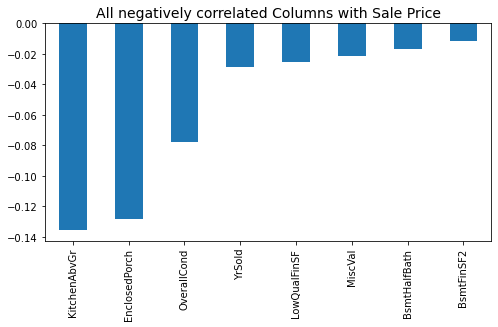

In [12]:
corr_price = df[numerical_ix].astype('float64').corr()['SalePrice']
plt.figure(figsize=(8,4))
plt.title('All negatively correlated Columns with Sale Price',fontsize=14)
corr_price.sort_values()[0:8].plot(kind='bar');
plt.xticks(rotation=90);

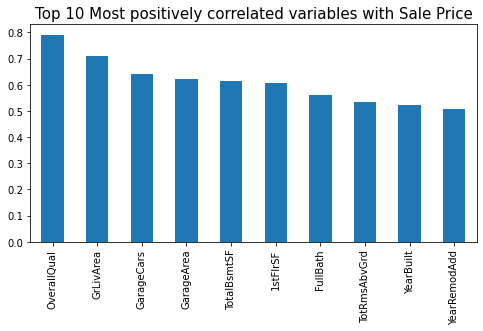

In [11]:
plt.figure(figsize=(8,4))
plt.title('Top 10 Most positively correlated variables with Sale Price',fontsize=15)
corr_price.sort_values(ascending=False)[1:11].plot(kind='bar');
plt.xticks(rotation=90);

### Exploration of Categorical Variables with Countplot

In [13]:
countplot_plot = widgets.Output()
countplot_drop = widgets.Dropdown(options = categorical_ix, description='Choose Categorical Column to Display a CountPlot',style=style,layout=widgets.Layout(width='45%'))
btn_countplot = widgets.Button(description='Display Countplot')

def display_countplot(b):
    countplot_plot.clear_output()
    col_value = countplot_drop.value
    with countplot_plot:
        plt.figure(figsize=(12,5))
        sns.countplot(df[col_value],palette='deep')
        plt.show()

In [14]:
display(countplot_drop)
display(btn_countplot)
display(countplot_plot)
btn_countplot.on_click(display_countplot)

Dropdown(description='Choose Categorical Column to Display a CountPlot', layout=Layout(width='45%'), options=(…

Button(description='Display Countplot', style=ButtonStyle())

Output()

### Check the relationship between Numerical Variables

In [15]:
scatter_plot = widgets.Output()
numeric_drop = widgets.Dropdown(options = numerical_ix, description='Choose the First Column to use in Scatter Plot',style=style,layout=widgets.Layout(width='45%'))
numeric_drop_2 = widgets.Dropdown(options = numerical_ix, description='Choose a Second Column to use in Scatter Plot',style=style,layout=widgets.Layout(width='45%'))
btn_scatter = widgets.Button(description='Display Scatterplot')

def display_scatter(b):
    scatter_plot.clear_output()
    num_value_1 = numeric_drop.value
    num_value_2 = numeric_drop_2.value
    with scatter_plot:
        plt.figure(figsize=(12,5))
        sns.scatterplot(df[num_value_1],df[num_value_2],alpha=0.5)
        plt.show()

In [16]:
display(numeric_drop)
display(numeric_drop_2)
display(btn_scatter)
display(scatter_plot)
btn_scatter.on_click(display_scatter)

Dropdown(description='Choose the First Column to use in Scatter Plot', layout=Layout(width='45%'), options=('L…

Dropdown(description='Choose a Second Column to use in Scatter Plot', layout=Layout(width='45%'), options=('Lo…

Button(description='Display Scatterplot', style=ButtonStyle())

Output()

One of the most interesting one is the correlation between GrLivArea and Sale Price - where there is a clear positive correlation, though there are quite a few outlies from both variables - which could highly influence the models